In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Tables

In this exercise, we will continue exploring the baseball salaries dataset you saw in a previous exercise. In this section, we want to find out if teams that pay higher salaries tend to win more than teams who pay lower salaries.

In [3]:
#Load tables
salaries = Table.read_table("salaries.csv")
teams = Table.read_table("teams.csv")

In [4]:
salaries

yearID,teamID,lgID,playerID,salary
1991,ATL,NL,averyst01,110000
1991,ATL,NL,berenju01,900000
1991,ATL,NL,blausje01,280000
1991,ATL,NL,breamsi01,1600000
1991,ATL,NL,cabrefr01,110000
1991,ATL,NL,castito02,165000
1991,ATL,NL,esaskni01,2100000
1991,ATL,NL,freemma02,190000
1991,ATL,NL,gantro01,1195000
1991,ATL,NL,glavito02,697500


In [5]:
teams

yearID,lgID,teamID,franchID,divID,W,L,DivWin,WCWin,LgWin,WSWin,name,park,attendance
1991,AL,BAL,BAL,E,67,95,N,nan,N,N,Baltimore Orioles,Memorial Stadium,2552753
1991,AL,BOS,BOS,E,84,78,N,nan,N,N,Boston Red Sox,Fenway Park II,2562435
1991,AL,CAL,ANA,W,81,81,N,nan,N,N,California Angels,Anaheim Stadium,2416236
1991,AL,CHA,CHW,W,87,75,N,nan,N,N,Chicago White Sox,Comiskey Park II,2934154
1991,AL,CLE,CLE,E,57,105,N,nan,N,N,Cleveland Indians,Cleveland Stadium,1051863
1991,AL,DET,DET,E,84,78,N,nan,N,N,Detroit Tigers,Tiger Stadium,1641661
1991,AL,KCA,KCR,W,82,80,N,nan,N,N,Kansas City Royals,Royals Stadium,2161537
1991,AL,MIN,MIN,W,95,67,Y,nan,Y,Y,Minnesota Twins,Hubert H Humphrey Metrodome,2293842
1991,AL,ML4,MIL,E,83,79,N,nan,N,N,Milwaukee Brewers,County Stadium,1478729
1991,AL,NYA,NYY,E,71,91,N,nan,N,N,New York Yankees,Yankee Stadium II,1863733


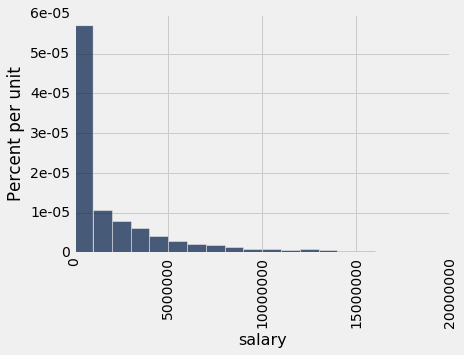

In [10]:
#Histogram of salaries
salaries.hist("salary", bins=np.arange(0, 20000000, 1000000))

What can you say about how much an average baseball player earns?

In [ ]:
#Create a histogram of the number of wins (the column named 'W').


What would you estimate as the average number of wins per season for a baseball team?

In [ ]:
#There's a lot of data, but let's just look at the most recent year: 2015.
salaries_2015 = salaries.where(salaries["yearID"] == 2015)
teams_2015 = ...

We don't actually care about the individual salary of a player; we care about the total amount each team is paying its players. Let's create a new table to store this information.

In [ ]:
#Create a table called 'salaries_by_team' that has one row per team (so 30 rows). The table should have three columns:
#one for the year, one for the team, and one for the total salary that team payed players that year.
#Hint: the 'groups' method takes in a list of column labels (instead of just one column label in 'group'), and groups
#by both the labels.
salaries_by_team = ...
salaries_by_team

In [ ]:
#Let's reformat the table. Relabel the table so that the column labels are: 'yearID', 'teamID', and 'salary'.
"""your code here"""
salaries_by_team.set_format("salary", NumberFormatter)

In [ ]:
#Now we want to find out if teams with a higher salary tend to win more games. Create a new table that has all the
#information from salaries_by_team and teams.
salaries_with_team = ...
salaries_with_team.set_format("attendance", NumberFormatter)
salaries_with_team

For simplicity's sake, let's categorize every team into division winners and non-division winners. Division winner have the value "Y" in the "DivWin" column. We want to know if division winners pay their players more than non-division winners do, and if that is consistent across both leagues (The league of a team is in the column "lgID": "AL" for American League and "NL" for National League).

In [ ]:
#Create a new table that has a row for each league. The table should have two columns, one for division winners and
#one for non-division winners. The value in the table should be the average salary for a team in that category.
division_salary = ...
division_salary

What does the table you produced above tell you about the average salary of division winners? Do they spend more on players than non-division winners? Justify your answer.

***Your answer here***

# Correlation and Regression

We will now explore the correlation between two sets of variables: salary and the number of wins, and the number of wins and attendance.

In [ ]:
#Some useful functions.
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [ ]:
#Create a new table 'plot_wins' with a column 'salary' and a column 'W', and plot (with salary on the x-axis).
plot_wins = ...
plot_wins.scatter("salary", fit_line=True)

In [ ]:
#Find the correlation between salary and number of wins.
correlation(plot_wins, "salary", "W")

Explain the above number. What does it mean? Is it consistent with your findings in using the table division_salary?

***Your answer here***

Now let's move on to another correlation that might be interesting: the number of wins and attendance.

In [ ]:
#Create a table 'plot_attendance' that has two columns: 'W' for number of wins, and 'attendance'. Use the original
#'teams' table to do this!
plot_attendance = ...
plot_attendance

In [ ]:
plot_attendance.scatter("W", fit_line=True)

In [ ]:
#Find the correlation coefficient of number of wins and attendance.


Explain the number above. What does it mean?

***Your answer here***

In [ ]:
#slope of the regression line
slope(plot_attendance, "W", "attendance")

In [ ]:
#intercept of the regression line
intercept(plot_attendance, "W", "attendance")

In [ ]:
#Create a new table 'fitted' that has a column 'W' for wins, a column 'attendance' for attendance, and a column
#'attendance (fitted)' for the estimated attendance based on the regression line.
fitted = ...
#These lines just format the table
fitted.set_format("attendance", NumberFormatter)
fitted.set_format("attendance (fitted)", NumberFormatter)
fitted

In [ ]:
#Plot the fitted attendance. Does it resemble the fit line above?
fitted.scatter(0, s=10)

Suppose you are the owner of the San Francisco Giants, and you want to predict your attendance for the 2016 season. Your general manager tells you that in all likelihood, your team will win 86 to 88 games this season. Based on these numbers, what should you expect your attendance to be in the range of?

In [ ]:
win_86 = ...
win_88 = ...

(win_86, win_88)

In [ ]:
# Add a column 'residuals' to the table.
residuals = ...
fitted = ...
fitted

In [ ]:
#Plot the residuals against number of wins.
fitted.scatter("W", "residuals")

What does the shape of the residuals graph say about the relationship between wins and attendance?

***Your answer here***